<a href="https://colab.research.google.com/github/Zuhair0000/tensorflow_bootcamp/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in Tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.19.0


# Creating data to view and fit

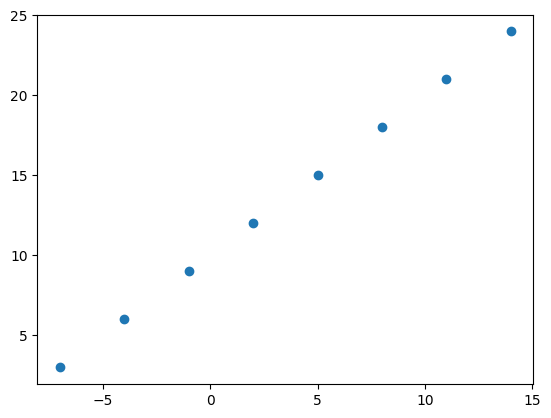

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0 , 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [3]:
housse_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
housse_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

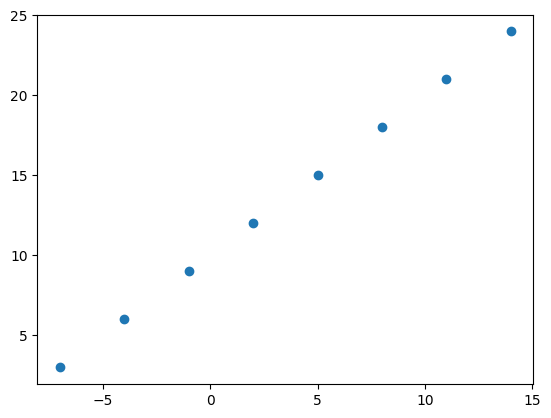

In [5]:
plt.scatter(X, y)

In [6]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 13.6772 - mae: 13.6772
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 10.9186 - mae: 10.9186
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - loss: 8.2003 - mae: 8.2003
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - loss: 4.1750 - mae: 4.1750
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - loss: 7.2121 - mae: 7.2121
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 6.6545 - mae: 6.6545
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 4.8310 - mae: 4.8310
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 3.8815 - mae: 3.8815
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 5.0804 - mae: 5.0804
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 5.3648 - mae: 5.3648
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 4.7694 - mae: 4.7694
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 3.6909 - mae: 3.6909
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [7]:
y_pred = model.predict(tf.constant([[17.0]], dtype=tf.float32))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[26.125975]], dtype=float32)

# Evaluate Model

In [8]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [9]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

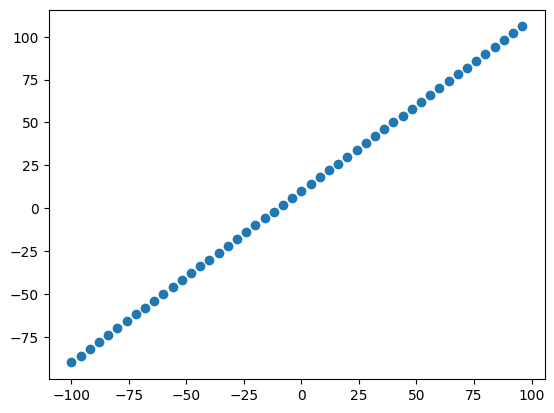

In [10]:
plt.scatter(X, y)

In [11]:
len(X)

50

In [12]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

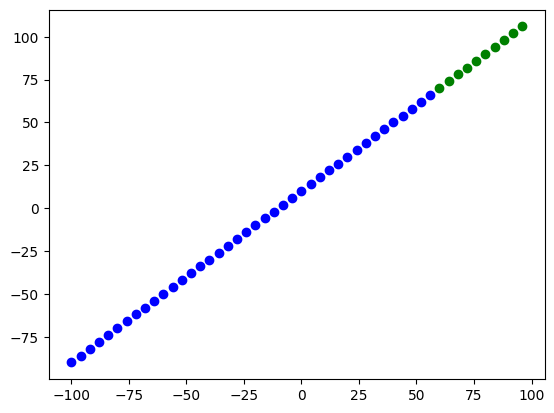

In [13]:
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[1]),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mae', optimizer='Adam', metrics=['mae'])

model.fit(X_train, y_train, epochs=100, verbose=0)

In [56]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 6)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 311 (1.22 KB)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 208 (836.00 B)

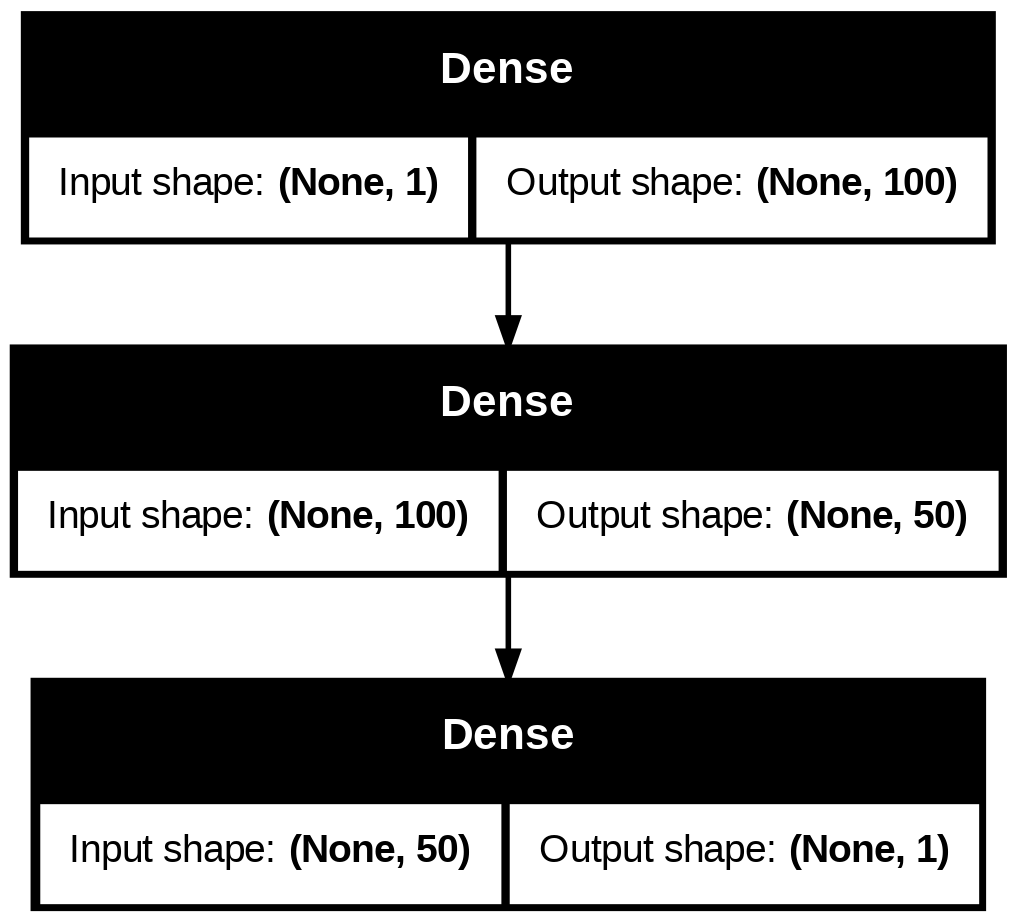

In [51]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

# Visualizing predictions

In [61]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[ 71.36113 ],
       [ 75.76272 ],
       [ 80.174576],
       [ 84.61921 ],
       [ 89.06387 ],
       [ 93.516914],
       [ 97.97366 ],
       [102.43039 ],
       [106.88714 ],
       [111.35641 ]], dtype=float32)

In [32]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

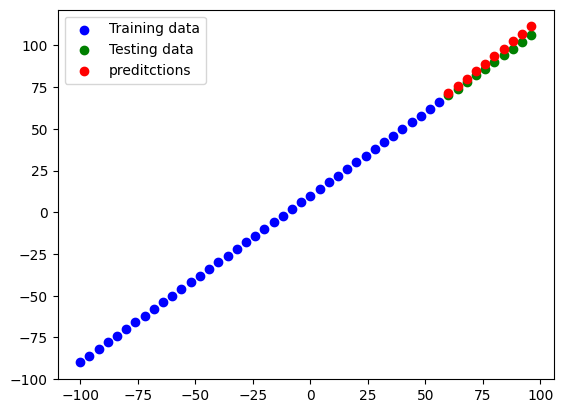

In [62]:
def plot_predictions(train_data = X_train,
                     train_labels= y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.scatter(train_data, train_labels, c='b', label="Training data")
  plt.scatter(test_data, test_labels, c='g', label="Testing data")
  plt.scatter(test_data, predictions, c='r', label="preditctions")
  plt.legend()
plot_predictions()

# Evaluating models

In [63]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 3.3146 - mae: 3.3146


[3.3146018981933594, 3.3146018981933594]

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

MAE: 3.3146018981933594
MSE: 12.629846572875977
